In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [14]:
# Load CSV file into the df
main_df = pd.read_csv('crypto_data.csv')
main_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [15]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1252 non-null   object 
 1   CoinName         1252 non-null   object 
 2   Algorithm        1252 non-null   object 
 3   IsTrading        1252 non-null   bool   
 4   ProofType        1252 non-null   object 
 5   TotalCoinsMined  744 non-null    float64
 6   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 60.0+ KB


In [16]:
#Drop any crypto currency that is not currently being traded
tr_df = main_df[main_df['IsTrading'] == True]
tr_df = tr_df.drop(columns=["IsTrading"]).reset_index(drop=True)
tr_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1139,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1140,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1141,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1142,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [17]:
# look for null values

tr_df.isnull().sum()

Unnamed: 0           0
CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [18]:
#Drop null values from the Dataframe and check again

tr_df = tr_df.dropna()

tr_df.isnull().sum()

Unnamed: 0         0
CoinName           0
Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [19]:
# Now drop all currencies that have not been mined
mined_df = tr_df[tr_df["TotalCoinsMined"]>0]
mined_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1134,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1138,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1141,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1142,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [20]:
#Drop CoinName from the dataframe

mined_df = mined_df.drop(columns=['Unnamed: 0', 'CoinName']).reset_index(drop=True)
mined_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
1,Scrypt,PoW/PoS,1.055185e+09,532000000
2,X13,PoW/PoS,2.927942e+10,314159265359
3,SHA-256,PoW,1.792718e+07,21000000
4,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
527,SHA-256,DPoS,2.000000e+09,2000000000
528,Scrypt,PoW/PoS,1.493105e+07,250000000
529,CryptoNight,PoW,9.802226e+08,1400222610
530,Equihash,PoW,7.296538e+06,21000000


In [22]:
#Use pandas get_dummies to turn Text Data in Columns "Algorithm" & "ProofType" yo numerical values

final_df = pd.get_dummies(mined_df, columns = ["Algorithm","ProofType"])

final_df

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
528,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
529,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
530,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


By using pd.get_dummies our dataset's columns increased from 4 to 94 suggesting a high number of options/features(values) for algorithm and proof type

In [28]:
#Scale the data to get our final DataSet
scaler = StandardScaler()
scaled = scaler.fit_transform(final_df)

scaled


array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

## Dimensionality Reduction

In [39]:
pca= PCA(n_components=0.9)
data_rd = pca.fit_transform(scaled)

In [45]:
rd_df = pd.DataFrame(data_rd)
rd_df.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,2.734816e-12,-5.417255e-15,-1.223976e-16,-0.007129,-1.319756,-0.051813,...,7.930746e-17,1.066184e-15,2.929092e-15,-7.260564e-16,-1.958946e-15,1.858141e-15,-1.863509e-15,7.873066e-16,-1.846167e-18,-4.153611e-15
1,-0.318434,1.032331,-0.591126,0.001386,2.712386e-12,-5.575109e-15,-2.141355e-16,-0.007739,-1.322514,-0.056674,...,5.236227e-17,3.558103e-16,3.123007e-15,-5.243003e-17,-1.703046e-15,1.069014e-15,-1.856951e-15,1.174094e-15,5.251165e-16,-3.804973e-15
2,2.305468,1.656383,-0.683617,0.004731,9.322259e-12,-6.700325e-15,7.872127e-15,-0.054781,-1.542879,-0.943951,...,3.638111e-14,-1.841986e-14,-5.521324e-14,-7.303804e-14,2.329683e-14,-3.527460e-14,3.114482e-14,2.752079e-14,-2.364644e-14,2.844002e-14
3,-0.145184,-1.320593,0.192813,-0.001229,-2.420624e-12,2.357806e-15,-1.697979e-15,-0.002071,0.281463,0.251862,...,4.765898e-15,2.352318e-17,-2.522688e-14,6.604406e-15,-9.542520e-15,-1.391009e-14,2.591484e-15,2.225494e-15,4.614234e-15,4.660314e-15
4,-0.151768,-2.036192,0.396182,-0.001705,-3.352037e-12,2.706411e-15,-1.587523e-15,0.027735,0.519099,0.188820,...,-3.035501e-14,6.137487e-14,-3.172419e-14,-3.873903e-14,-7.522860e-14,-7.057959e-14,4.784940e-14,9.436182e-15,1.251016e-13,-3.544121e-15


## t-SNE

In [52]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)
tsne_ = tsne.fit_transform(rd_df)

tsne_pd = pd.DataFrame(tsne_)

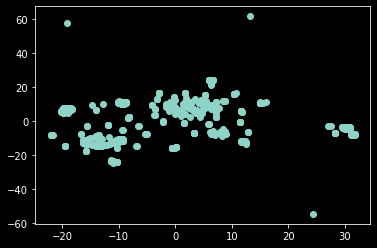

In [53]:
# Visualize clusters of t-SNE
plt.style.use('dark_background')
plt.scatter(tsne_pd[0], tsne_pd[1])
plt.show()

## Cluster Analysis -> k-Mean

C:\Users\gpsuser\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


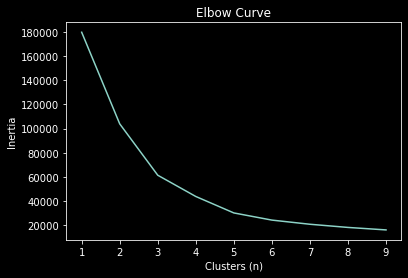

In [71]:
inertia = []
k = list(range(1,10))

# get the best value for k with elbow graph

for x in k:
    kmean = KMeans(n_clusters=x, random_state = 29)
    kmean.fit(tsne_pd)
    inertia.append(kmean.inertia_)

elbow_ = {"k_n" : k , "Inertia": inertia}
elbow_df = pd.DataFrame(elbow_)


plt.style.use('dark_background')
plt.plot(elbow_df["k_n"], elbow_df["Inertia"])
plt.xticks(list(range(1,10)))
plt.title("Elbow Curve")
plt.xlabel("Clusters (n)")
plt.ylabel("Inertia")
plt.show()

5 seems to be the place where the elbow curve stabilizes, so we will try clustering with 5 and see how it comes out.

In [76]:
# use k=5 from elbow curve
m = KMeans(n_clusters=5, random_state=29)
m.fit(tsne_pd)
predictions = m.predict(tsne_pd)
tsne_pd["label"] = m.labels_
tsne_pd

,0,1,label
0,-9.303761,-10.945421,0
1,-16.308987,-11.563685,0
2,-11.413398,-23.039774,0
3,30.671949,-4.698071,3
4,10.436041,16.029430,4
...,...,...,...
527,27.462473,-3.027972,3
528,-14.134707,-14.404464,0
529,5.940191,23.792843,4
530,15.047577,10.784621,4


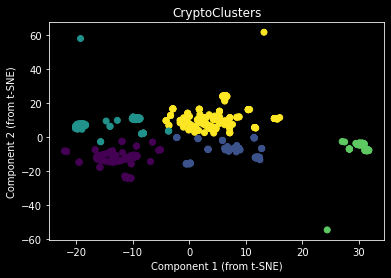

In [77]:
plt.style.use('dark_background')
plt.scatter(tsne_pd[0], tsne_pd[1], c=tsne_pd["label"])
plt.xlabel("Component 1 (from t-SNE)")
plt.ylabel("Component 2 (from t-SNE)")
plt.title("CryptoClusters")
plt.show()

## Recommendation

based on the analysis, and using the most valued features from t-sne after a PCA reduction of the features, we could group our active mined cryptocurrencies into 5 clusters or groups, of which only one seems to be pretty well defined, and the other for have very similar boundaries.